# UTCI changes over time

In [1]:
# Import needed packages
import cartopy.crs as ccrs
import time
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import regionmask
import xarray as xr

In [29]:
# Import the data
folder = "/gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg/BCC-CSM2-MR/"
output_folder = "../results/"
subfolders = os.listdir(folder)
print(subfolders)
def convert_kelvin(x):
    return x - 273.15

['historical', 'ssp126', 'ssp245', 'ssp585']


In [3]:
for subfolder in subfolders[1:2]:
    ssfolders = os.listdir(os.path.join(folder, subfolder))
    print(ssfolders)
    for ssfolder in ssfolders[:2]:
        # files = os.listdir(os.path.join(folder, subfolder, ssfolder))
        # print(files)
        data = xr.open_mfdataset(
            os.path.join(folder, subfolder, ssfolder, "*.nc"), concat_dim="time", engine="netcdf4",
            #chunks={'lat': 30, 'lon': 30, 'time': -1}
        )
        resample = data.resample(time="M").mean()

['r1i1p1f1']


In [4]:
popdata = pd.read_csv(
    "/gws/pw/j05/cop26_hackathons/bristol/project10/population_data/gpw_v4_population_density_adjusted_to_2015_unwpp_country_totals_rev11_2020_1_deg.asc", 
    header=None, sep=" ", skiprows=range(6), na_values=-9999
)
popdata = popdata.iloc[:, :-1]
popdata = popdata.iloc[::-1, :]
popdata.columns = resample.lon.values
popdata_xr = popdata.set_index(resample.lat.values, drop=True)
popdata_xr = xr.DataArray(popdata, dims=("lat", "lon"))
popdata_xr = popdata_xr.assign_coords(lat=resample.lat.values)
popdata_xr = popdata_xr.assign_coords(lon=resample.lon.values)
popdata_xr

<xarray.DataArray (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

<GeoAxesSubplot:xlabel='lon', ylabel='lat'>

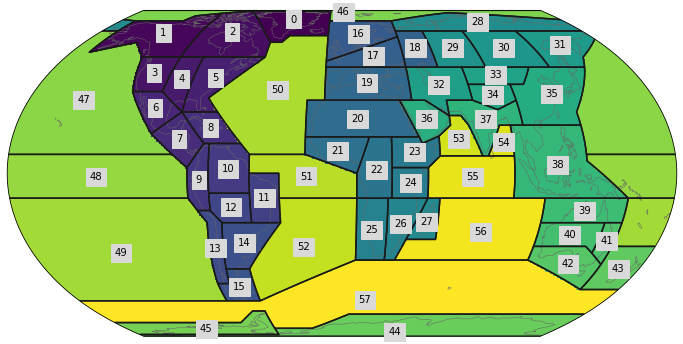

In [5]:
mask = regionmask.defined_regions.ar6.all.mask(resample)
proj = ccrs.EqualEarth()
f = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection=proj)
mask.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
regionmask.defined_regions.ar6.all.plot(
    ax=ax, coastlines=True
)

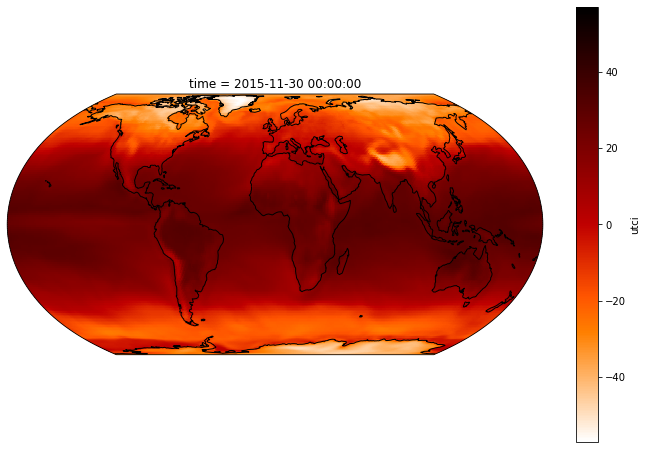

In [6]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=proj)
(resample.isel(time=10).utci-273.15).plot(
    ax=ax, transform=ccrs.PlateCarree(), add_colorbar=True, cmap="gist_heat_r"
)
ax.coastlines()

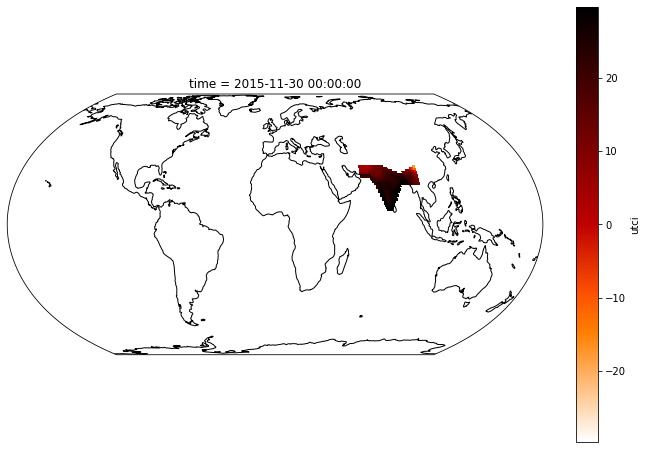

In [7]:
indiaMask = 37
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=proj)
(resample.isel(time=10).utci.where(mask==indiaMask)-273.15).plot(
    ax=ax, transform=ccrs.PlateCarree(), add_colorbar=True, cmap="gist_heat_r"
)
ax.coastlines()

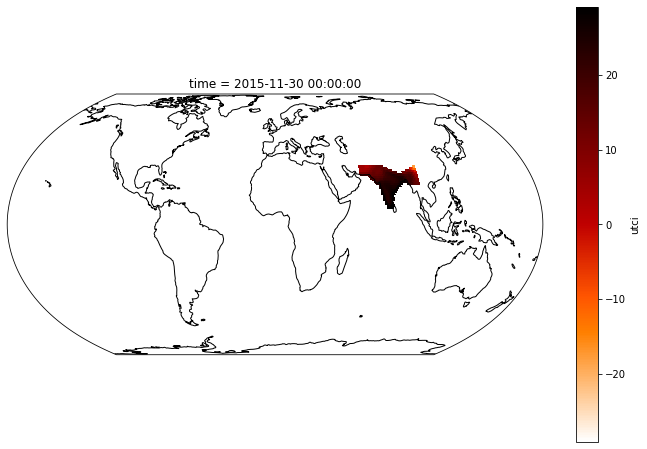

In [8]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=proj)
(resample.isel(time=10).utci.where((mask==indiaMask) & (popdata_xr>0))-273.15).plot(
    ax=ax, transform=ccrs.PlateCarree(), add_colorbar=True, cmap="gist_heat_r"
)
ax.coastlines()

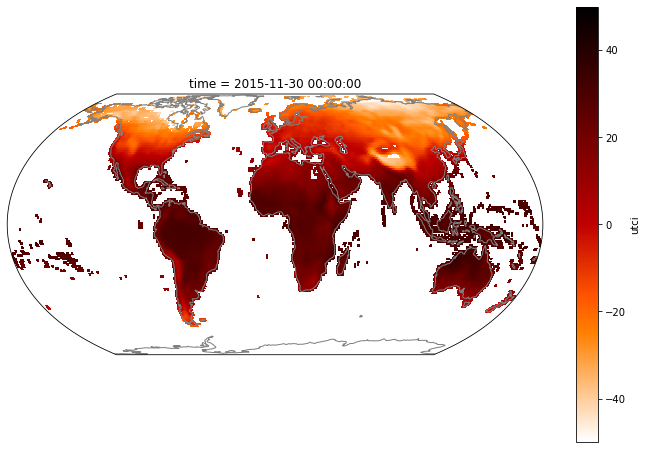

In [9]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=proj)
(resample.isel(time=10).utci.where(popdata_xr>0)-273.15).plot(
    ax=ax, transform=ccrs.PlateCarree(), add_colorbar=True, cmap="gist_heat_r"
)
ax.coastlines(color='grey')

In [10]:
#os.environ['HDF5_USE_FILE_LOCKING']='FALSE'

In [11]:
division_len = 130
tmax = len(resample.time)
masked_india = pd.DataFrame(columns=["utci"])
t0 = time.time()
for ind in range(tmax % division_len):
    masked_india = masked_india.append(
        (resample.utci.where((mask==indiaMask) & (popdata_xr>0))-273.15).mean(["lat", "lon"])[
            ind*division_len: min((ind+1)*division_len, tmax)
        ].to_dataframe()
    )
    print(ind)
    print("Time: " + str(time.time()-t0))


0
Time: 172.55710673332214
1
Time: 379.64614939689636
2
Time: 582.8258235454559
3
Time: 816.384425163269
4
Time: 1015.1497046947479
5
Time: 1221.5928497314453
6
Time: 1440.4040250778198
7
Time: 1661.1901059150696
8
Time: 1662.830973148346
9
Time: 1663.3521931171417
10
Time: 1663.8871765136719
11
Time: 1664.4163331985474
12
Time: 1664.953241109848
13
Time: 1665.7216691970825
14
Time: 1666.2093172073364
15
Time: 1666.7356951236725
16
Time: 1667.2487816810608
17
Time: 1667.7769937515259
18
Time: 1668.3199512958527
19
Time: 1668.935108423233
20
Time: 1669.4664113521576
21
Time: 1670.0057685375214
22
Time: 1670.543202161789
23
Time: 1671.0511281490326
24
Time: 1671.549328804016
25
Time: 1672.072254896164
26
Time: 1672.5740480422974
27
Time: 1673.121696472168
28
Time: 1673.682633638382
29
Time: 1674.2131145000458
30
Time: 1674.8237760066986
31
Time: 1675.6835253238678
32
Time: 1676.2261493206024
33
Time: 1676.763696193695
34
Time: 1677.2915618419647
35
Time: 1677.8100502490997
36
Time: 1678.

In [12]:
masked_india

,utci
2015-01-31 00:00:00,12.947074
2015-02-28 00:00:00,15.522194
2015-03-31 00:00:00,22.001403
2015-04-30 00:00:00,26.179606
2015-05-31 00:00:00,31.022100
...,...
2100-08-31 00:00:00,30.150701
2100-09-30 00:00:00,28.754993
2100-10-31 00:00:00,27.117118
2100-11-30 00:00:00,21.105275


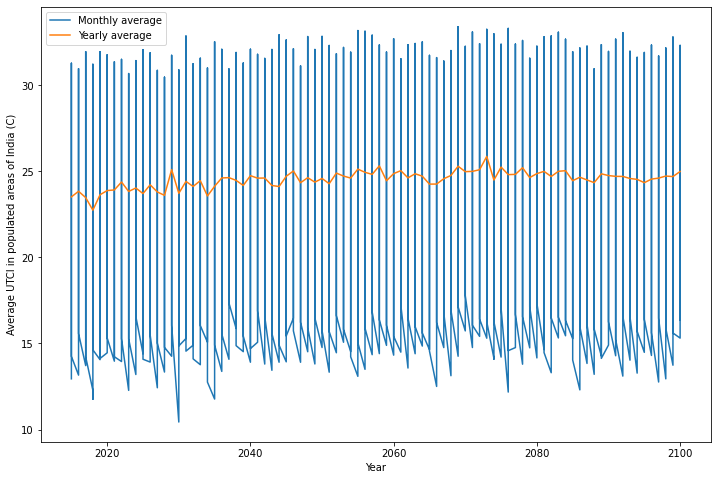

In [36]:
fig = plt.figure(figsize=(12, 8))
plt.plot([i.year for i in masked_india.index], masked_india.utci)
plt.plot(masked_india.groupby([i.year for i in masked_india.index]).mean())
plt.xlabel("Year")
plt.ylabel("Average UTCI in populated areas of India (C)")
plt.legend(["Monthly average", "Yearly average"])
fig.savefig(os.path.join(output_folder, "IndiaYearlyAndMonthlyAverageUTCI.png"))

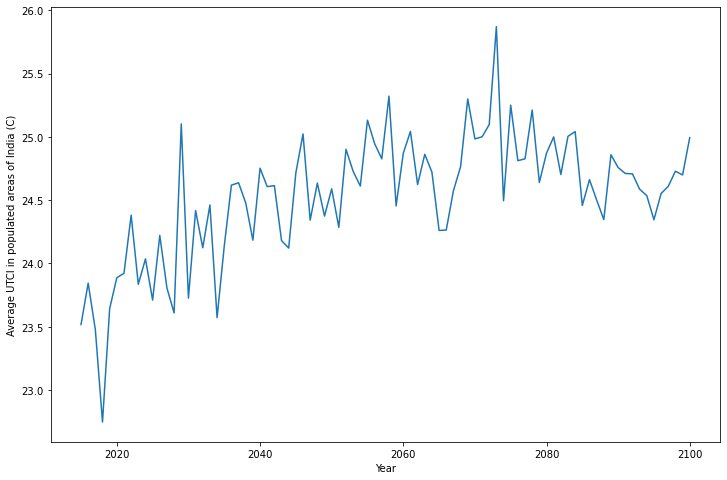

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(masked_india.groupby([i.year for i in masked_india.index]).mean())
plt.xlabel("Year")
plt.ylabel("Average UTCI in populated areas of India (C)")
fig.savefig(os.path.join(output_folder, "IndiaYearlyAverageUTCI.png"))

In [23]:
division_len = 130
tmax = len(resample.time)
masked_india = pd.DataFrame(columns=["utci"])
t0 = time.time()
for ind in range(tmax % division_len):
    masked_india = masked_india.append(
        (resample.utci.where((mask==indiaMask) & (popdata_xr>0))-273.15).mean(["lat", "lon"])[
            ind*division_len: min((ind+1)*division_len, tmax)
        ].to_dataframe()
    )
    print(ind)
    print("Time: " + str(time.time()-t0))

,utci
2015,31.286013
2016,30.968394
2017,31.956144
2018,31.224346
2019,31.948702
...,...
2096,32.342456
2097,31.706013
2098,32.171404
2099,32.807123


In [ ]:
division_len = 130
NorthEuropeMask = 16
tmax = len(resample.time)
masked_europe = pd.DataFrame(columns=["utci"])
t0 = time.time()
for ind in range(tmax % division_len):
    masked_europe = masked_europe.append(
        (resample.utci.where((mask==NorthEuropeMask) & (popdata_xr>0))-273.15).mean(["lat", "lon"])[
            ind*division_len: min((ind+1)*division_len, tmax)
        ].to_dataframe()
    )
    print(ind)
    print("Time: " + str(time.time()-t0))


0
Time: 197.5328347682953
